In [1]:
#python program to load images to numpy array
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, optimizers
#import image from pillow
import PIL
import pathlib
import glob
import os.path
from os.path import splitext, basename
import matplotlib.pyplot as plt

In [22]:
from keras.models import model_from_json
#num_classes = 10
path  = "wpod-net.h5"
path = splitext(path)[0]
with open('%s.json' % path, 'r') as json_file:
        model_json = json_file.read()
model = model_from_json(model_json, custom_objects={})
model.load_weights('%s.h5' % path)
wpod_net = model

In [23]:
def preprocess_image(image_path,resize=False):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255
    if resize:
        img = cv2.resize(img, (224,224))
    return img

Found 312 images


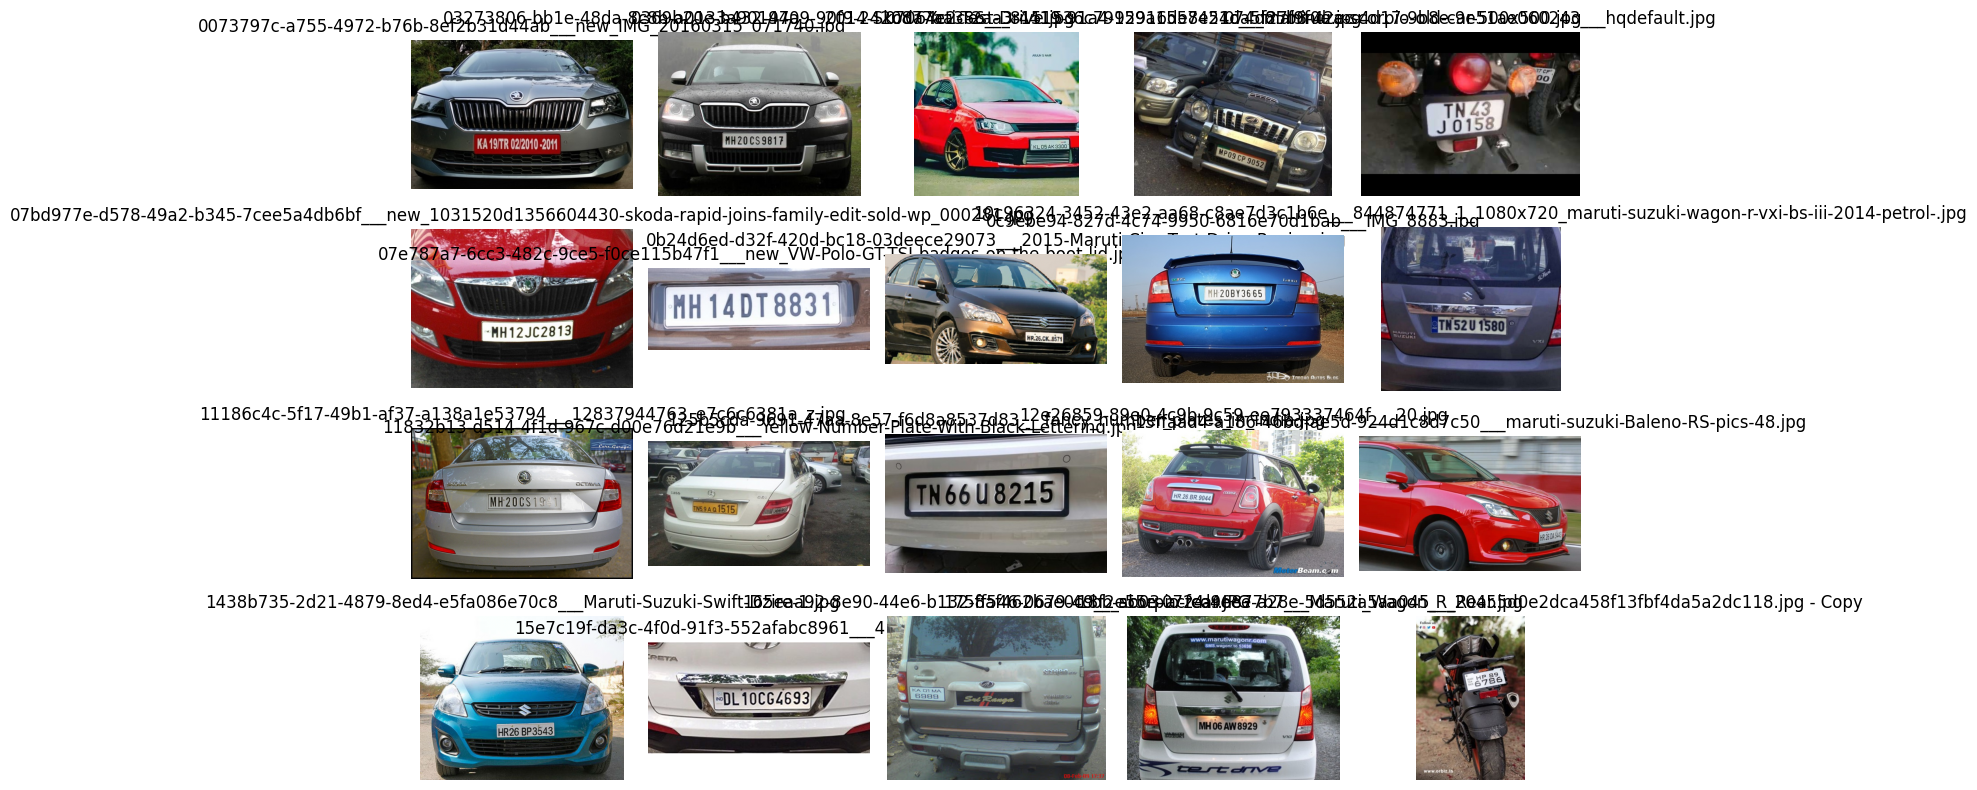

In [24]:
# Create a list of image paths
image_path = glob.glob(r"C:\Users\Ankush Hegde\Desktop\My projects\Kavach Hackathon\Test Images JPEG/*.jpeg")
print(f"Found {len(image_path)} images")

#visualize the images in plot
fig = plt.figure(figsize=(12,8))
cols = 5
row = 4
fig_list = []
for i in range( cols*row ):
    fig_list.append(fig.add_subplot(row, cols, i+1))
    title = splitext(basename(image_path[i]))[0]
    fig_list[-1].set_title(title)
    img = preprocess_image(image_path[i])
    plt.axis(False)
    plt.imshow(img)

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 85ms/step
Detect 1 plate(s) in WhatsApp Image 2023-03-30 at 9.37.08 PM (1)
Coordinate of plate(s) in image: 
 [array([[642.95461872, 788.43254635, 782.26696897, 636.78904135],
       [513.21430607, 462.87718026, 513.83393762, 564.17106343],
       [  1.        ,   1.        ,   1.        ,   1.        ]])]


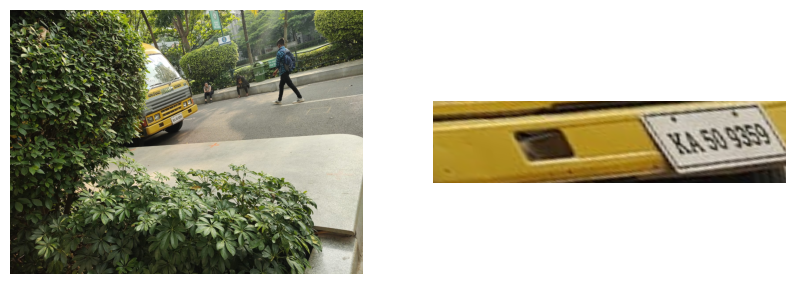

In [53]:
from local_utils import detect_lp

def get_plate(image_path, Dmax=608, Dmin=256):
    vehicle = preprocess_image(image_path)
    ratio = float(max(vehicle.shape[:2])) / min(vehicle.shape[:2])
    side = int(ratio * Dmin)
    bound_dim = min(side, Dmax)
    _ , LpImg, _, cor = detect_lp(wpod_net, vehicle, bound_dim, lp_threshold=0.5)
    return LpImg, cor

# Obtain plate image and its coordinates from an image
test_image = image_path[307]
LpImg,cor = get_plate(test_image)
print("Detect %i plate(s) in"%len(LpImg),splitext(basename(test_image))[0])
print("Coordinate of plate(s) in image: \n", cor)

# Visualize our result
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.axis(False)
plt.imshow(preprocess_image(test_image))
plt.subplot(1,2,2)
plt.axis(False)
plt.imshow(LpImg[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


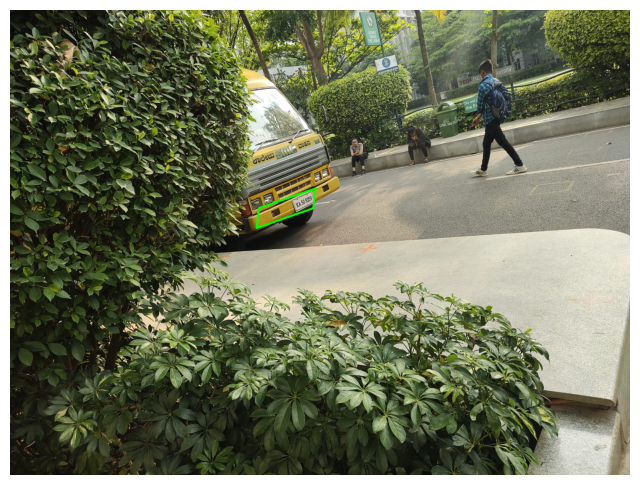

In [54]:
def draw_box(image_path, cor, thickness=3): 
    pts=[]  
    x_coordinates=cor[0][0]
    y_coordinates=cor[0][1]
    # store the top-left, top-right, bottom-left, bottom-right 
    # of the plate license respectively
    for i in range(4):
        pts.append([int(x_coordinates[i]),int(y_coordinates[i])])
    
    pts = np.array(pts, np.int32)
    pts = pts.reshape((-1,1,2))
    vehicle_image = preprocess_image(image_path)
    
    cv2.polylines(vehicle_image,[pts],True,(0,255,0),thickness)
    return vehicle_image

plt.figure(figsize=(8,8))
plt.axis(False)
plt.imshow(draw_box(test_image,cor))